## Importing Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import kagglehub

# Loading the dataset

In [5]:
path = kagglehub.dataset_download("isatish/phishing-dataset-uci-ml-csv")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/isatish/phishing-dataset-uci-ml-csv/versions/1


In [13]:
data = pd.read_csv(path + "/uci-ml-phishing-dataset.csv")
data.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Removing duplicates

In [9]:
data = data.drop_duplicates()

## Separating features and labels

In [18]:
data['Result'].tail()

,Result
11050,1
11051,-1
11052,-1
11053,-1
11054,-1


## Replacing "-1" From "0"

In [20]:
# Convert labels for binary classification
data['Result'] = data['Result'].replace(-1, 0)
data['Result'].tail()

,Result
11050,1
11051,0
11052,0
11053,0
11054,0


In [21]:
X = data.drop("Result", axis=1)  # Assuming 'Class' is the target column
y = data["Result"]

## Train-test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Normalizing features

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8288 - loss: 0.3761 - val_accuracy: 0.9380 - val_loss: 0.1562
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.1808 - val_accuracy: 0.9394 - val_loss: 0.1397
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1513 - val_accuracy: 0.9358 - val_loss: 0.1442
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9333 - loss: 0.1546 - val_accuracy: 0.9462 - val_loss: 0.1220
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1280 - val_accuracy: 0.9466 - val_loss: 0.1198
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1146 - val_accuracy: 0.9534 - val_loss: 0.1094
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9493 - loss: 0.1158 - val_accuracy: 0.9552 - val_loss: 0.1033
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9485 - loss: 0.1166 - val_accuracy: 0

# Evaluating the model

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.0753
Test Accuracy: 0.97


# Predictions

In [28]:
predictions = (model.predict(X_test) > 0.5).astype(int)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


# Metrics

In [29]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       980
           1       0.95      0.99      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Ploting training and validation accuracy

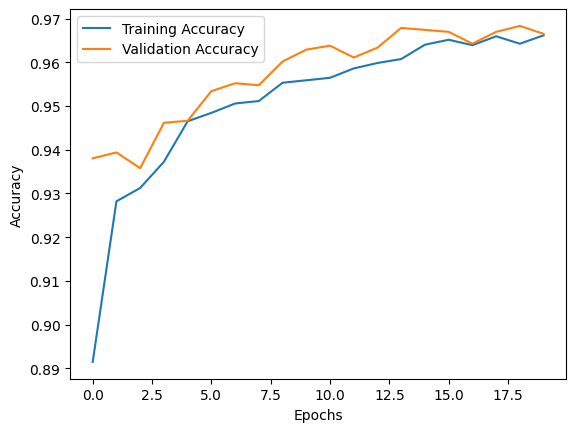

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()